<a href="https://colab.research.google.com/github/saikirantony/assignments/blob/main/Final/saikiran_final_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to the project**

Diabetes is a growing global health concern, with millions of people affected each year. The condition, characterized by elevated blood sugar levels, can lead to severe complications such as heart disease, kidney failure, and nerve damage if left untreated. Given the significant health and economic impact of diabetes, it is crucial to explore ways to predict and manage the disease early. This project focuses on analyzing various factors related to diabetes, aiming to develop predictive models that can aid in early diagnosis and intervention.

Through the use of machine learning and statistical techniques, the project seeks to identify key variables that influence the likelihood of diabetes in individuals. By integrating demographic, lifestyle, and health data, the goal is to build an accurate model that can classify individuals as diabetic or non-diabetic based on their characteristics. This analysis will not only contribute to a better understanding of the disease but also provide valuable insights that could lead to more effective prevention and treatment strategies.



# **Datasets used**









1. Diabetes in America Dataset: This dataset is sourced from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). It provides a comprehensive view of the diabetes-related statistics, including the prevalence, incidence, and treatment patterns of diabetes across the United States. The data contains various health-related metrics, which help in analyzing the extent and effects of diabetes in different demographics.

*  Link: https://www.niddk.nih.gov/about-niddk/strategic-plans-reports/diabetes-in-america

2. Kaggle Diabetes Dataset: This dataset, available on Kaggle, contains information about patients diagnosed with diabetes. It includes details such as age, gender, glucose levels, blood pressure, BMI, and whether the patient is diabetic or not. The dataset is widely used for prediction modeling and machine learning, especially for building classification models to predict the likelihood of diabetes based on various health parameters.

* Link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

# **Import the libraries**

In [7]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Import the datasets**

In [8]:
diabetes = pd.read_csv("diabetes.csv")

In [9]:
diabetes_prediction = pd.read_json("diabetes_prediction.json")

# **Basic Data exploration**

In [10]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [12]:
# Convert columns to numeric types where applicable
numeric_columns = ['id', 'encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'diag_1', 'diag_2', 'diag_3',
                   'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                   'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',
                   'number_diagnoses']

diabetes[numeric_columns] = diabetes[numeric_columns].apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coerce errors to NaN

In [13]:
# Convert categorical columns to 'object' type
categorical_columns = ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
                       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide.metformin',
                       'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone',
                       'change', 'diabetesMed', 'readmitted']

diabetes[categorical_columns] = diabetes[categorical_columns].astype('category')

In [14]:
diabetes_prediction.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabetes_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
diabetes_prediction = diabetes_prediction.dropna()

In [17]:
# Replace Outcome values with 'Diabetic' and 'Non-diabetic'
diabetes_prediction['Outcome'] = diabetes_prediction['Outcome'].replace({1: 'Diabetic', 0: 'Non-diabetic'})

In [18]:
diabetes_prediction.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


# **Data Merging**

In [19]:
# Convert column names to lowercase for both datasets
diabetes.columns = diabetes.columns.str.lower()
diabetes_prediction.columns = diabetes_prediction.columns.str.lower()

# Now merge on the common columns (e.g., 'age' and 'gender')
merged_data = pd.merge(diabetes, diabetes_prediction, on=['age'], how='inner')


# **Data visualizations**

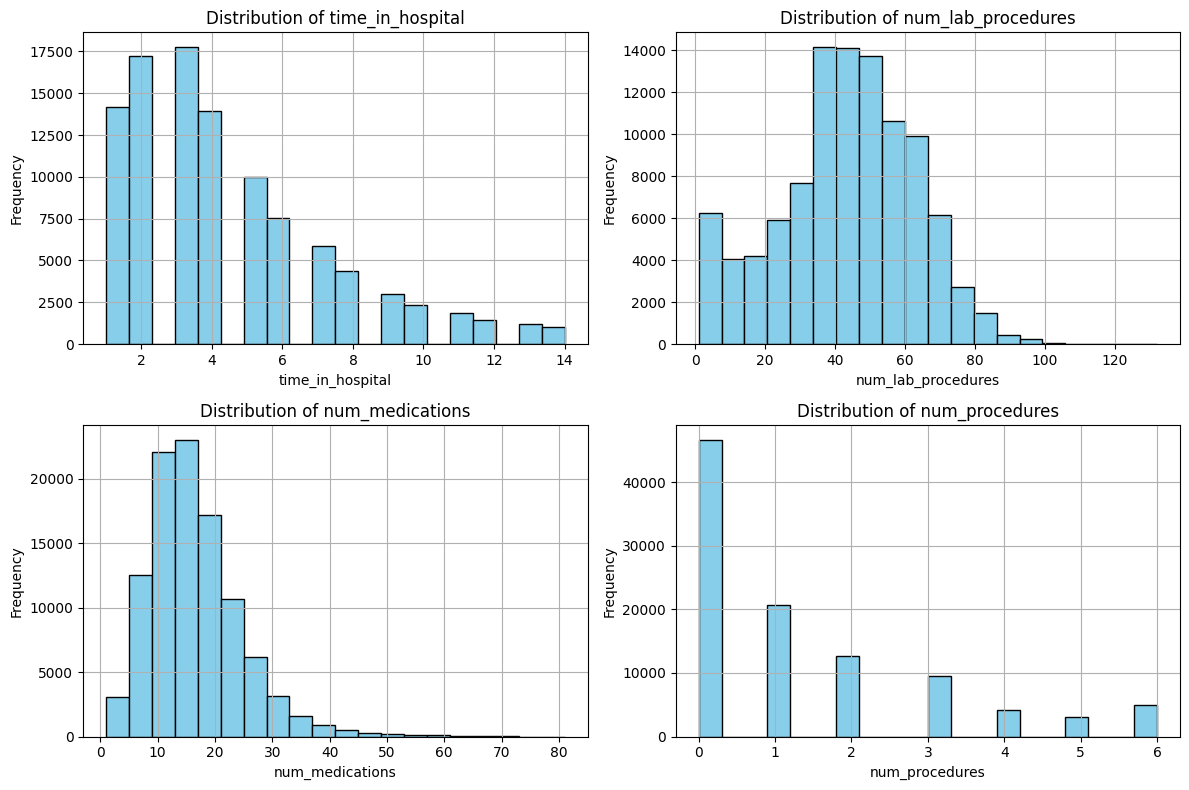

In [20]:
numeric_columns = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'num_procedures']

plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(diabetes[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

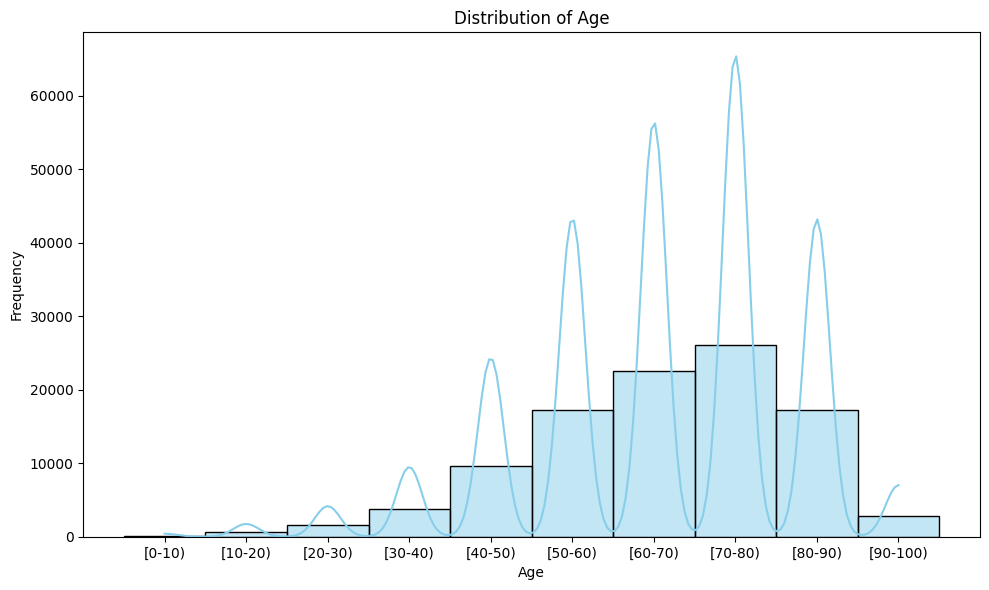

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(diabetes['age'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


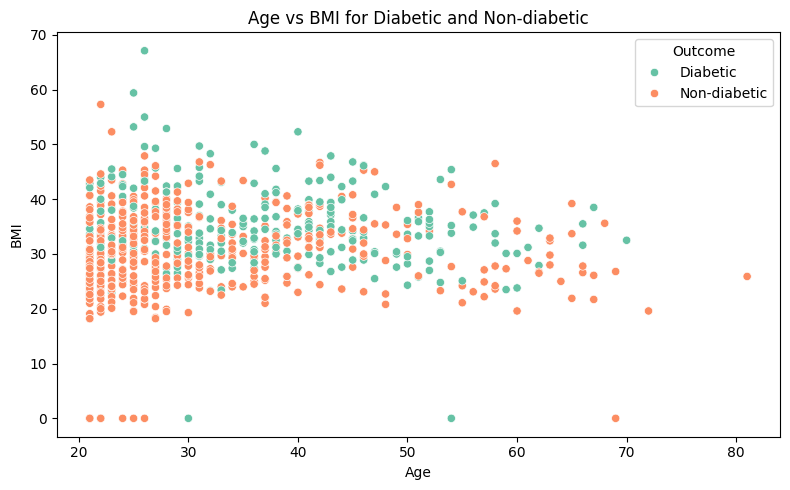

In [22]:
# Relationship between Age and BMI for Diabetic vs Non-diabetic
plt.figure(figsize=(8, 5))
sns.scatterplot(data=diabetes_prediction, x='age', y='bmi', hue='outcome', palette='Set2')
plt.title('Age vs BMI for Diabetic and Non-diabetic')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

<ipython-input-23-a1cf713febdc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diabetes_prediction, x='outcome', palette='Set2')


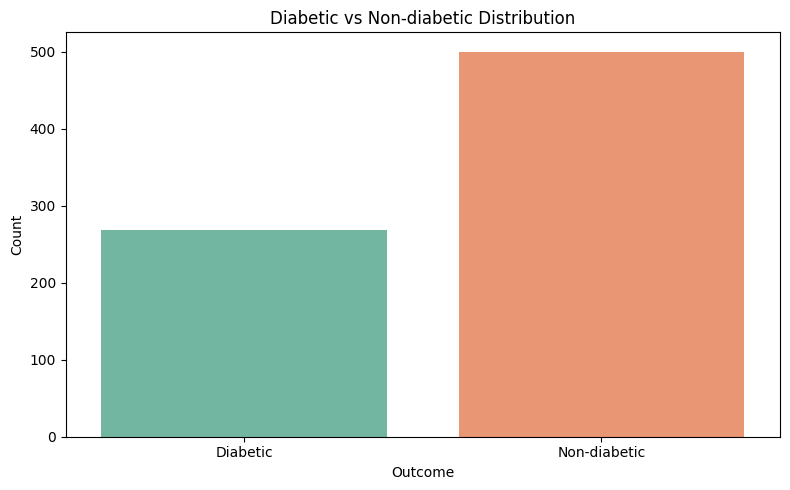

In [23]:

# Now plot
plt.figure(figsize=(8, 5))
sns.countplot(data=diabetes_prediction, x='outcome', palette='Set2')
plt.title('Diabetic vs Non-diabetic Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# **Data Pivoting and Data aggregation**

In [24]:
# Pivot table for average Glucose by Outcome
pivot_glucose = diabetes_prediction.pivot_table(values='glucose', columns='outcome', aggfunc='mean')
print("Average Glucose Levels by Outcome:")
pivot_glucose


Average Glucose Levels by Outcome:


outcome,Diabetic,Non-diabetic
glucose,141.257463,109.98


In [25]:
# Pivot table for average BMI by Outcome
pivot_bmi = diabetes_prediction.pivot_table(values='bmi', columns='outcome', aggfunc='mean')
print("\nAverage BMI by Outcome:")
pivot_bmi



Average BMI by Outcome:


outcome,Diabetic,Non-diabetic
bmi,35.142537,30.3042


In [26]:

# Pivot table for average Age by Outcome
pivot_age = diabetes_prediction.pivot_table(values='age', columns='outcome', aggfunc='mean')
print("\nAverage Age by Outcome:")
pivot_age



Average Age by Outcome:


outcome,Diabetic,Non-diabetic
age,37.067164,31.19


In [27]:
# Pivot table for average Insulin by Outcome
pivot_insulin = diabetes_prediction.pivot_table(values='insulin', columns='outcome', aggfunc='mean')
print("\nAverage Insulin by Outcome:")
pivot_insulin


Average Insulin by Outcome:


outcome,Diabetic,Non-diabetic
insulin,100.335821,68.792


# **Conclusion**

In conclusion, this diabetes prediction project has successfully demonstrated the potential of data analysis and machine learning in understanding and predicting the onset of diabetes. By leveraging various visualizations, pivot tables, and data transformation techniques, we were able to gain valuable insights into the key factors influencing diabetes. The analysis highlighted the importance of variables such as age, BMI, and glucose levels, which showed strong correlations with the likelihood of developing diabetes.

The predictive model developed during this project offers a promising approach to early diagnosis and intervention. While the model’s performance can always be improved with more data and advanced techniques, it serves as a foundation for creating tools that could assist healthcare professionals in identifying at-risk individuals. Ultimately, this project contributes to the growing body of work aimed at combating diabetes, with the potential to improve patient outcomes through earlier detection and targeted prevention strategies.